#Clasificación enfermos de diabetes.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from plotly.subplots import make_subplots

In [54]:
URL = 'https://raw.githubusercontent.com/Adrian-Cancino/DataScience/refs/heads/main/Data/diabetes.csv'

#Lectura del dataset

In [55]:
datos = pd.read_csv(URL)
datos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [56]:
dict_columnas = {
    'Pregnancies': 'Embarazos',
    'Glucose': 'Glucosa',
    'BloodPressure': 'PresionSanguinea',
    'SkinThickness': 'EspesorPiel',
    'Insulin': 'Insulina',
    'BMI': 'IMC',
    'DiabetesPedigreeFunction': 'HistorialDiabetes',
    'Age': 'Edad',
    'Outcome': 'Diabetico'
}
datos = datos.rename(columns=dict_columnas)

In [57]:
datos

,Embarazos,Glucosa,PresionSanguinea,EspesorPiel,Insulina,IMC,HistorialDiabetes,Edad,Diabetico
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Busco valores faltantes o nulos

In [58]:
datos.isnull().sum()

,0
Embarazos,0
Glucosa,0
PresionSanguinea,0
EspesorPiel,0
Insulina,0
IMC,0
HistorialDiabetes,0
Edad,0
Diabetico,0


In [59]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Embarazos          768 non-null    int64  
 1   Glucosa            768 non-null    int64  
 2   PresionSanguinea   768 non-null    int64  
 3   EspesorPiel        768 non-null    int64  
 4   Insulina           768 non-null    int64  
 5   IMC                768 non-null    float64
 6   HistorialDiabetes  768 non-null    float64
 7   Edad               768 non-null    int64  
 8   Diabetico          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
datos.describe()

,Embarazos,Glucosa,PresionSanguinea,EspesorPiel,Insulina,IMC,HistorialDiabetes,Edad,Diabetico
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
fig = px.line(datos.describe())
fig.update_layout(title='Descripción de los datos')
fig.show()

In [62]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Embarazos,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucosa,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
PresionSanguinea,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
EspesorPiel,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulina,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
IMC,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
HistorialDiabetes,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Edad,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetico,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [63]:
fig = px.line(datos.describe().T)
fig.update_layout(title='Descripción de los datos')
fig.show()

In [64]:
datos_copy = datos.copy()
datos_copy.head()

,Embarazos,Glucosa,PresionSanguinea,EspesorPiel,Insulina,IMC,HistorialDiabetes,Edad,Diabetico
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
datos_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Embarazos,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucosa,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
PresionSanguinea,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
EspesorPiel,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulina,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
IMC,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
HistorialDiabetes,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Edad,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetico,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [66]:
datos_copy.columns

Index(['Embarazos', 'Glucosa', 'PresionSanguinea', 'EspesorPiel', 'Insulina',
       'IMC', 'HistorialDiabetes', 'Edad', 'Diabetico'],
      dtype='object')

In [67]:
datos_copy.iloc[:, [1, 2, 3, 4, 5,]] = datos_copy.iloc[:, [1, 2, 3, 4, 5,]].replace(0, np.nan)

<ipython-input-67-4a7e087fe0dc>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucosa, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-67-4a7e087fe0dc>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: PresionSanguinea, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-67-4a7e087fe0dc>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of panda

In [68]:
datos_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Embarazos          768 non-null    int64  
 1   Glucosa            763 non-null    float64
 2   PresionSanguinea   733 non-null    float64
 3   EspesorPiel        541 non-null    float64
 4   Insulina           394 non-null    float64
 5   IMC                757 non-null    float64
 6   HistorialDiabetes  768 non-null    float64
 7   Edad               768 non-null    int64  
 8   Diabetico          768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


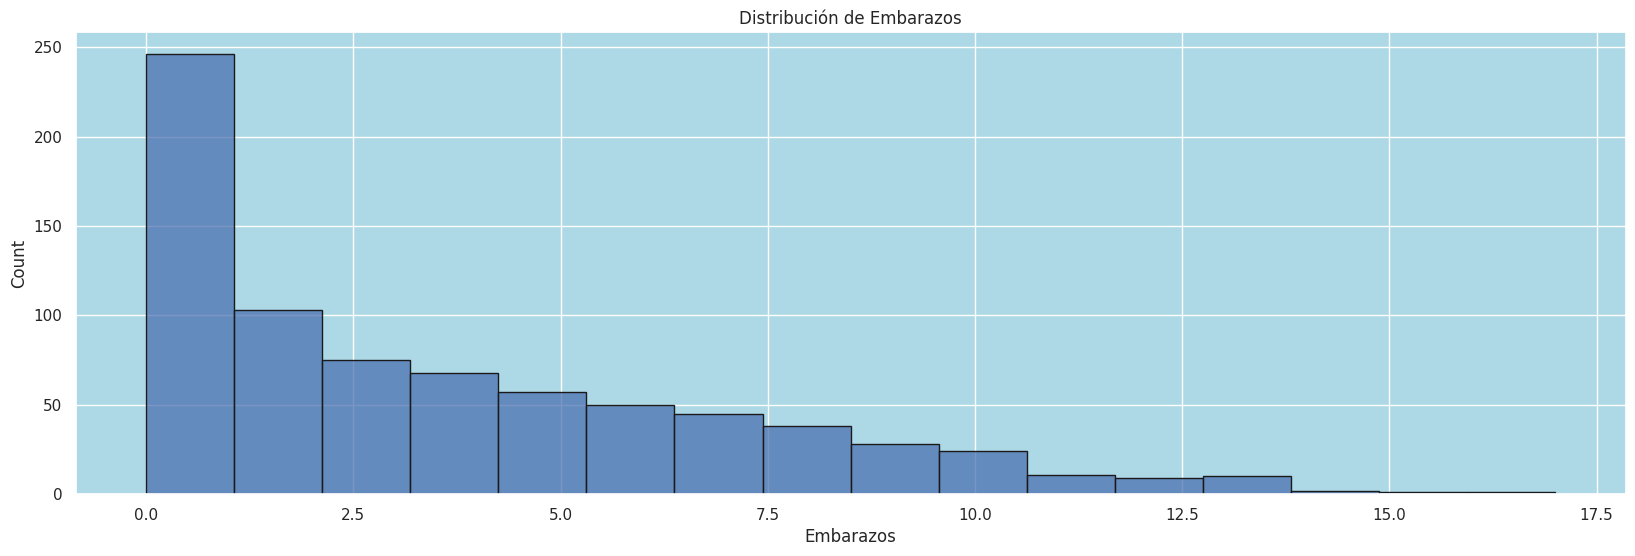

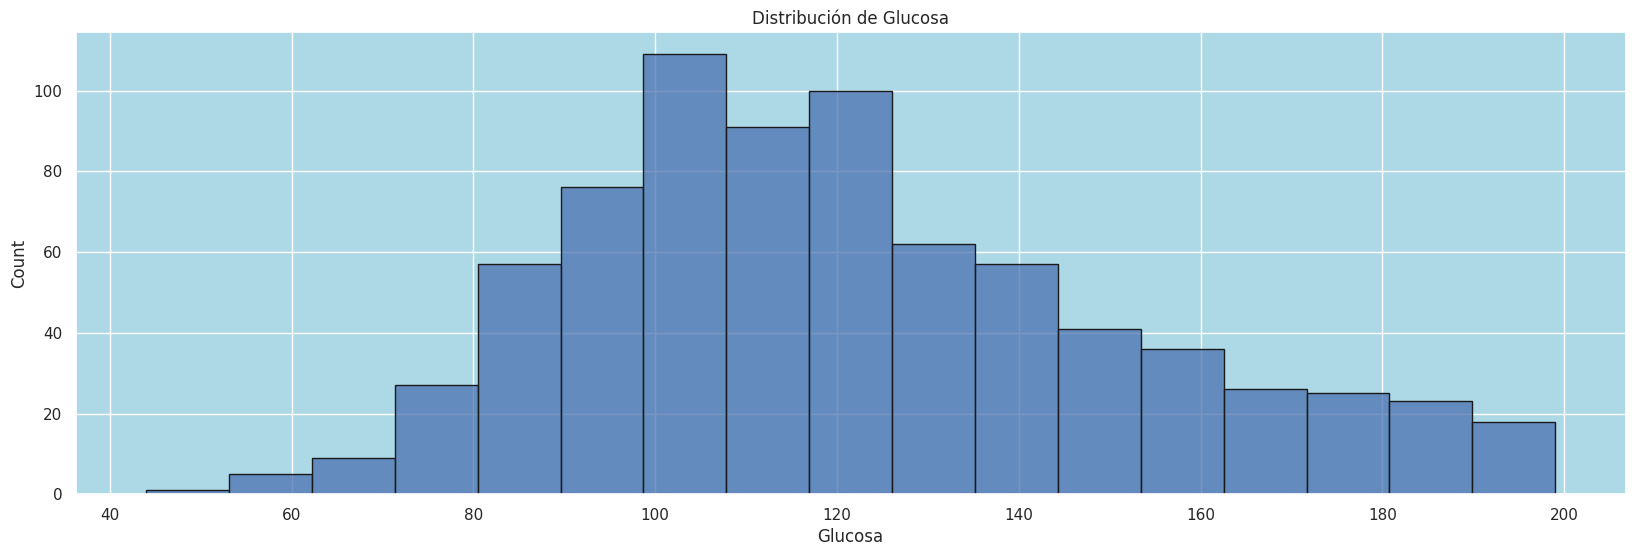

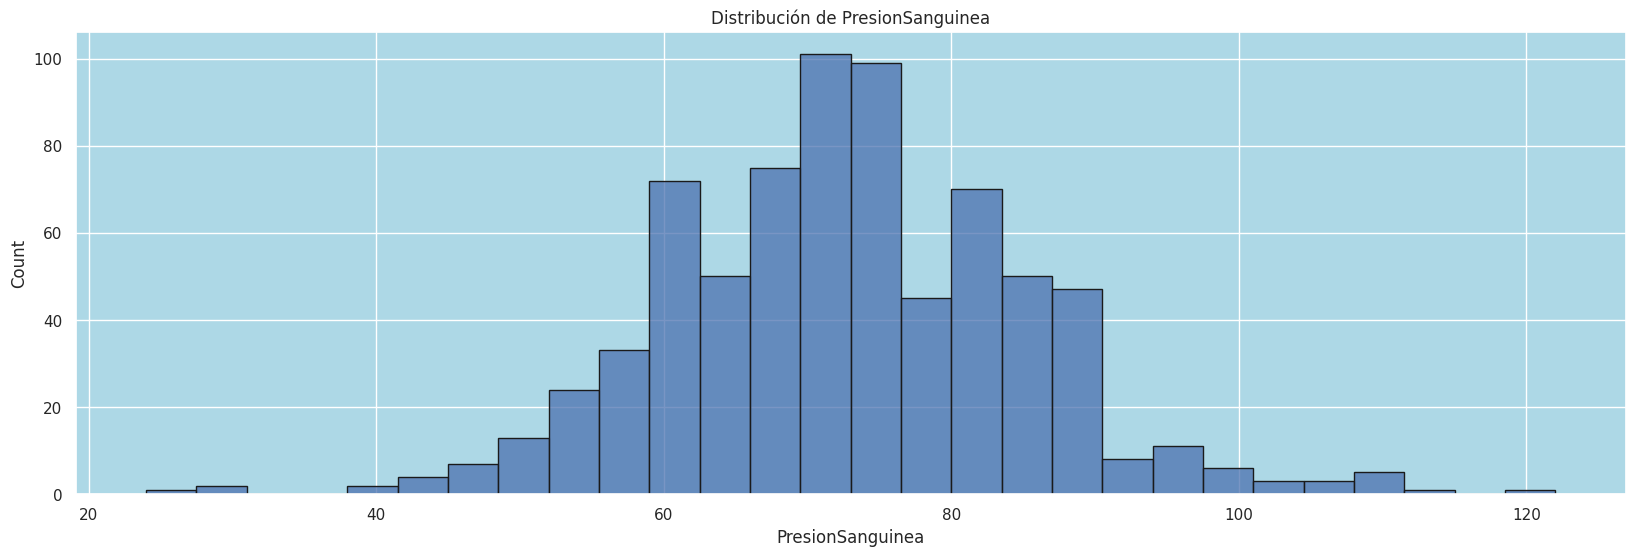

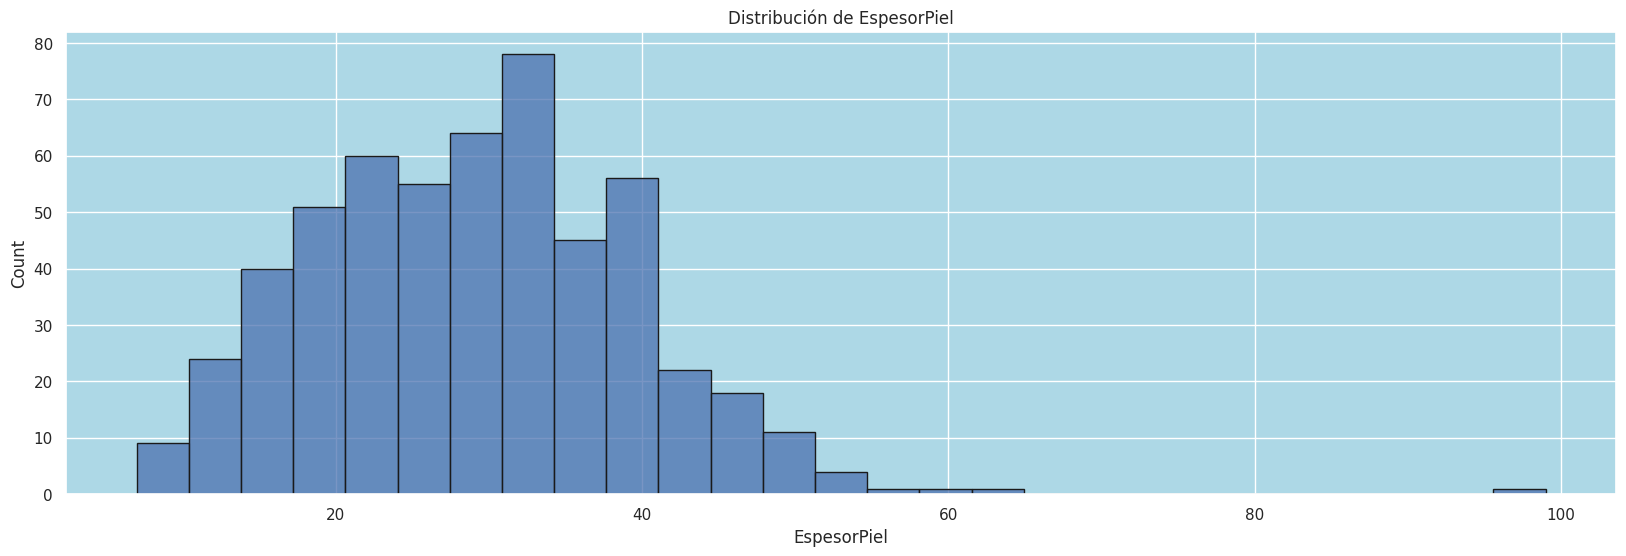

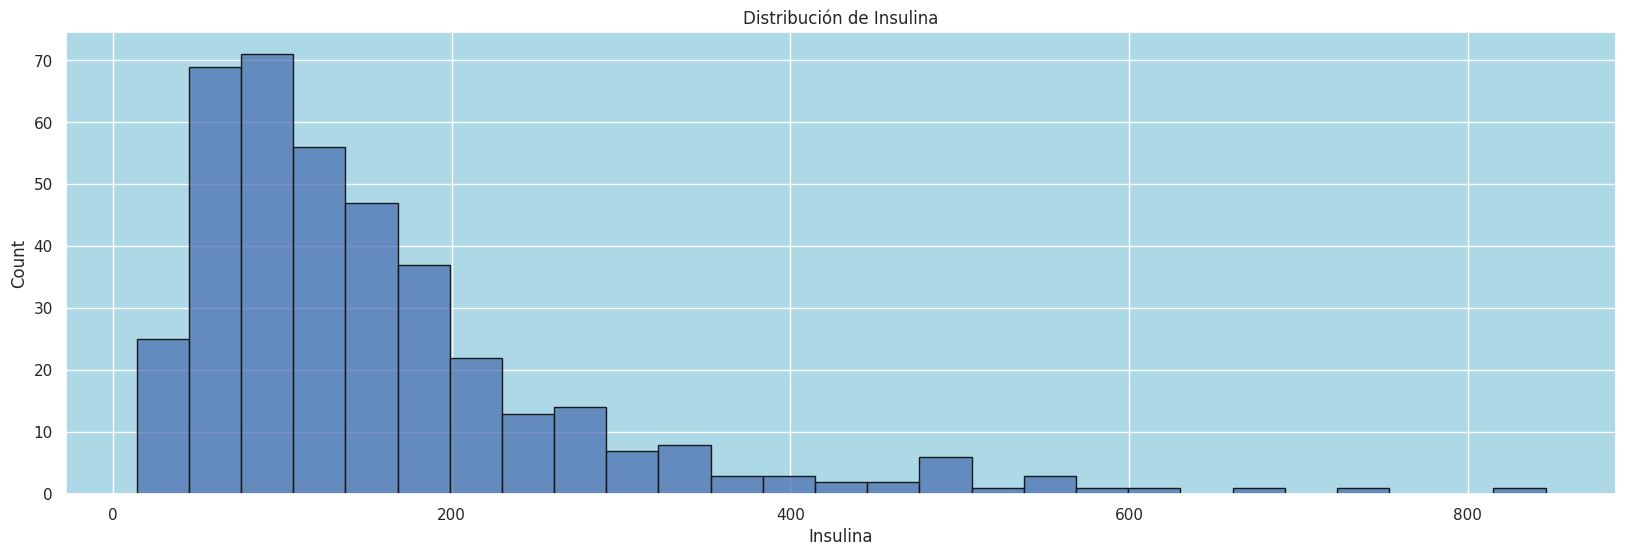

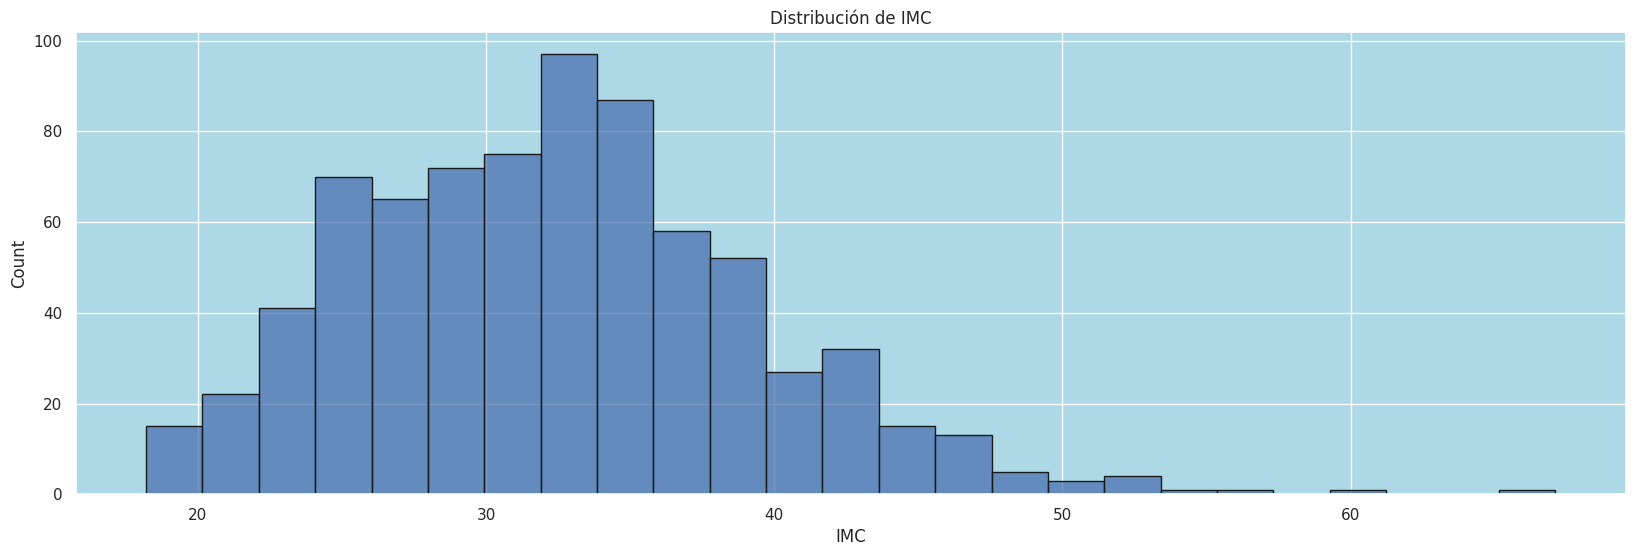

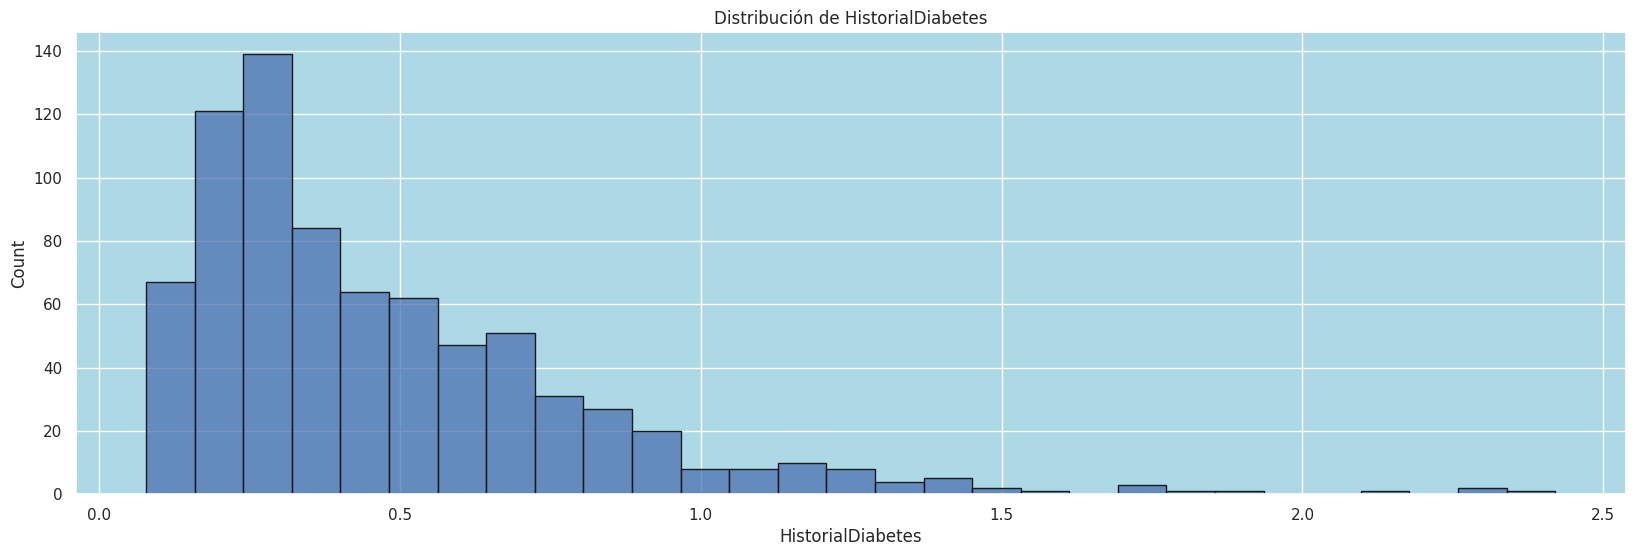

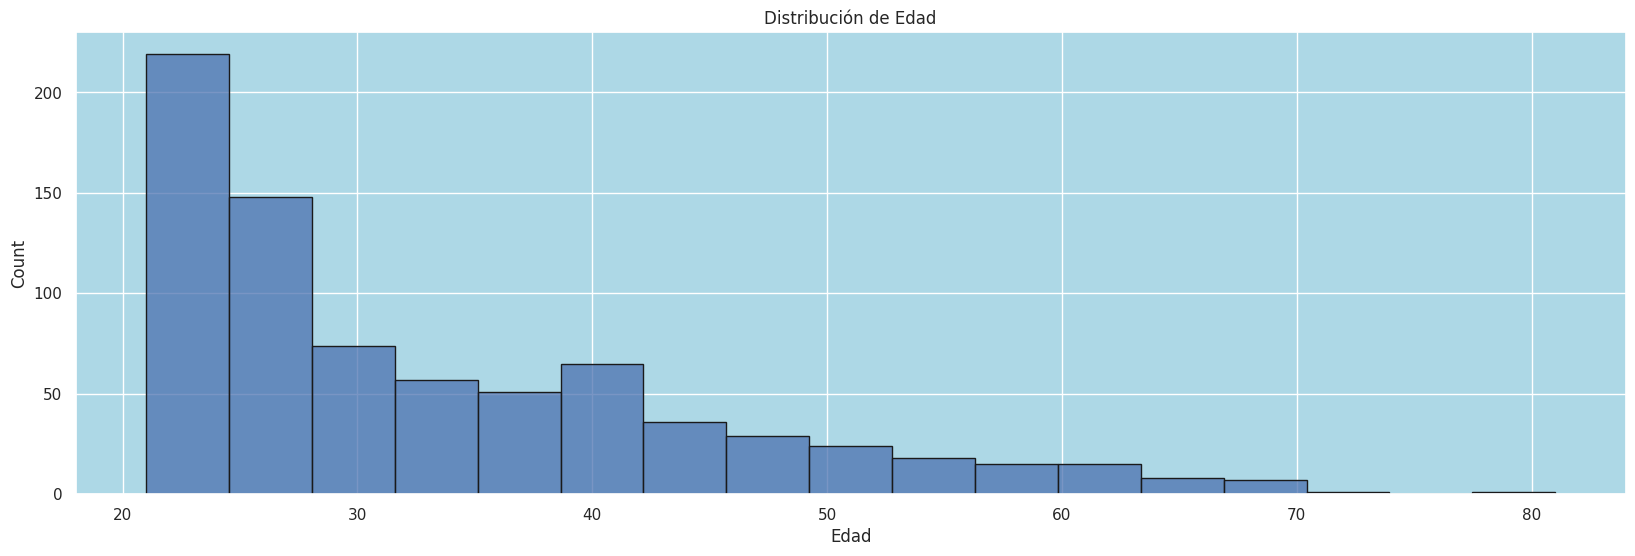

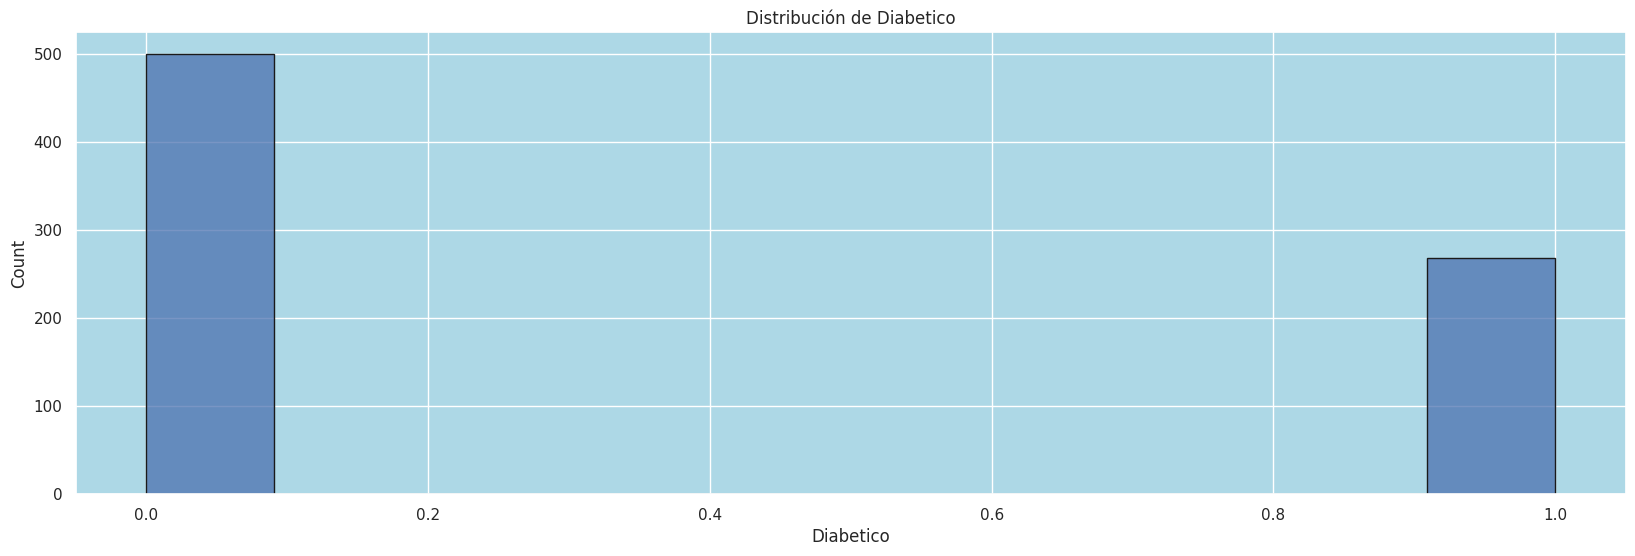

In [69]:
for col in datos_copy.columns:
    sns.set_style('darkgrid')
    sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
    plt.figure(figsize=(20, 6))
    sns.histplot(data=datos_copy, x=col, edgecolor='k')
    plt.title(f'Distribución de {col}')
    plt.show()

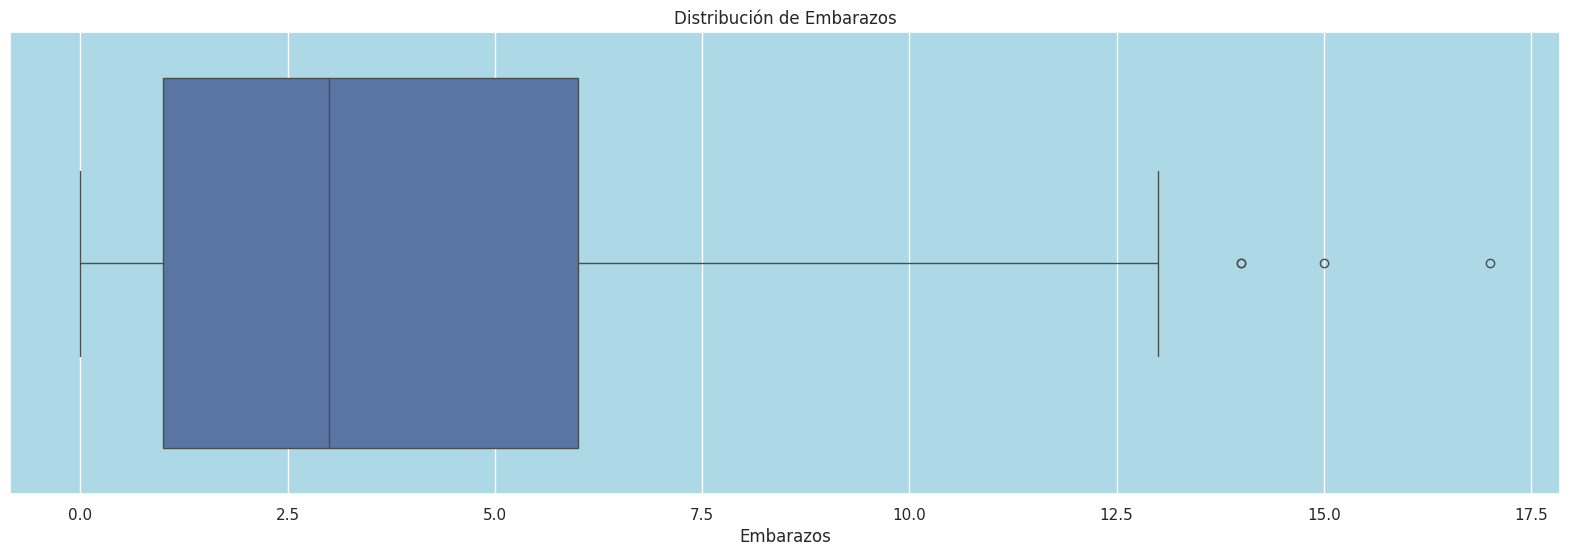

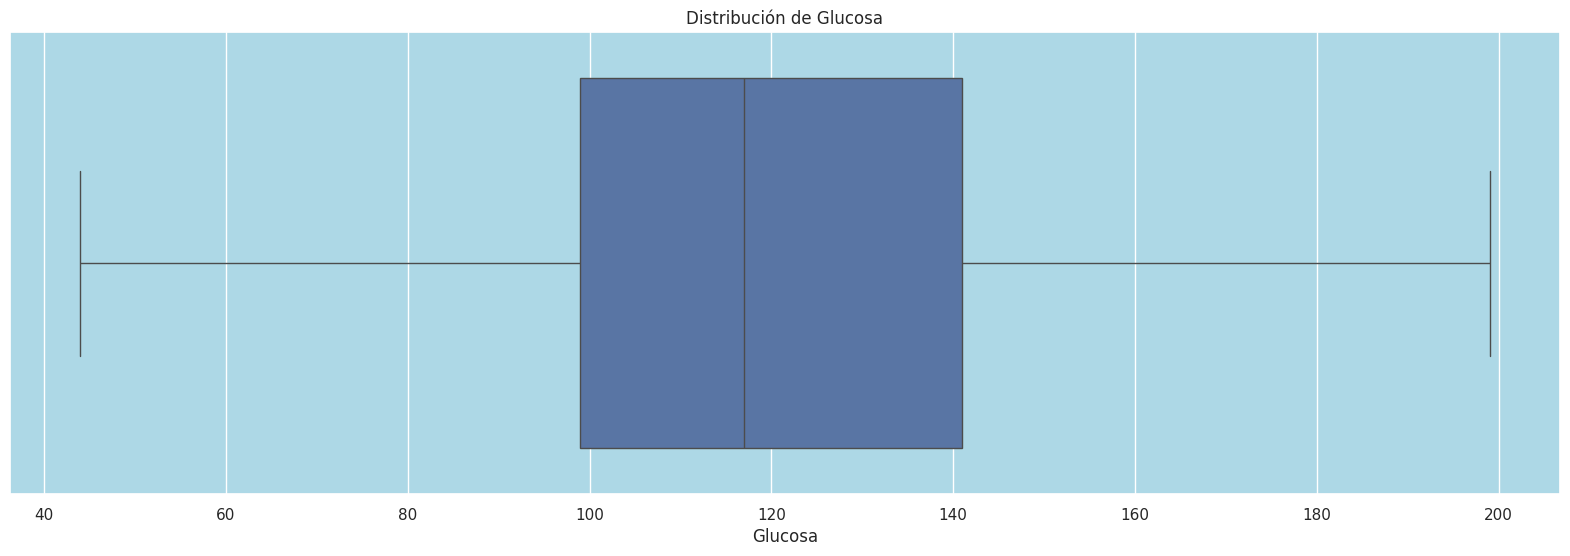

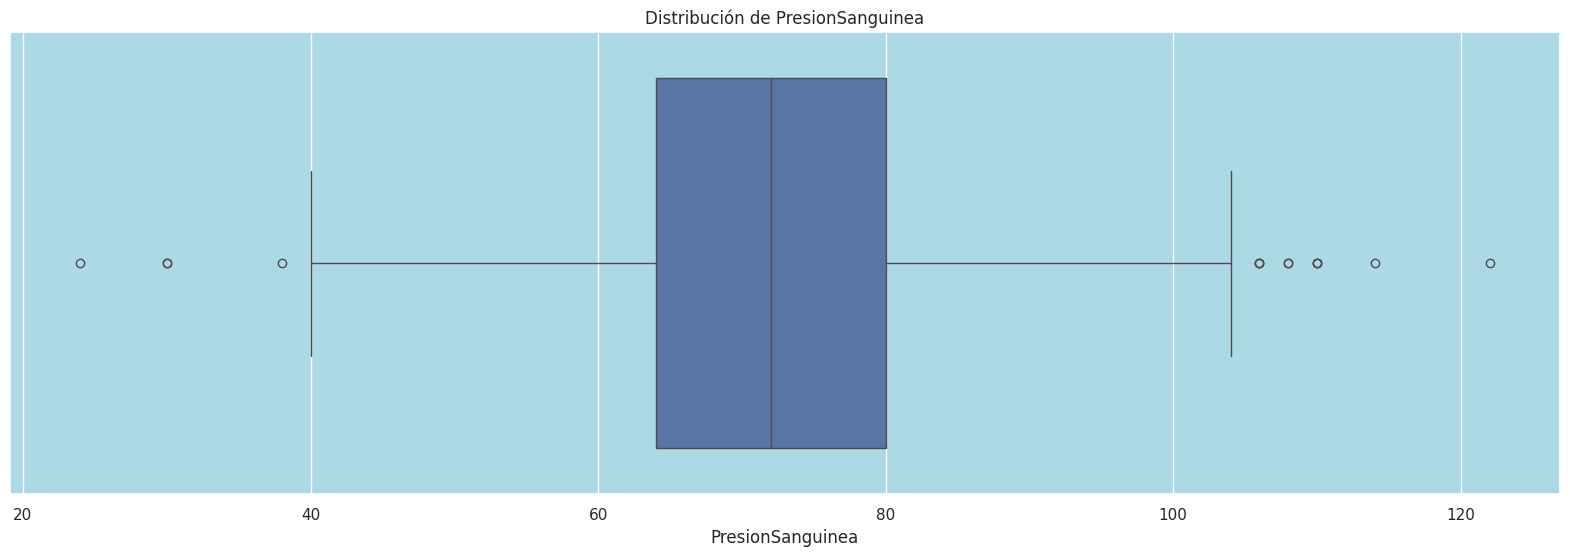

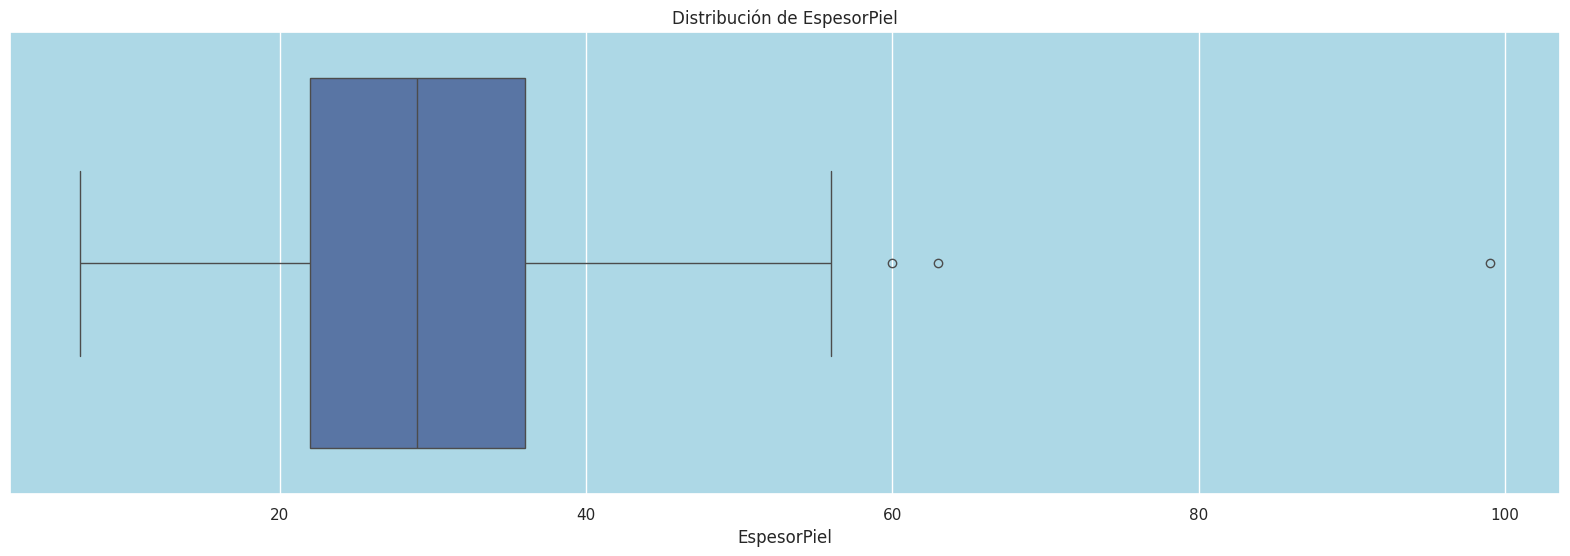

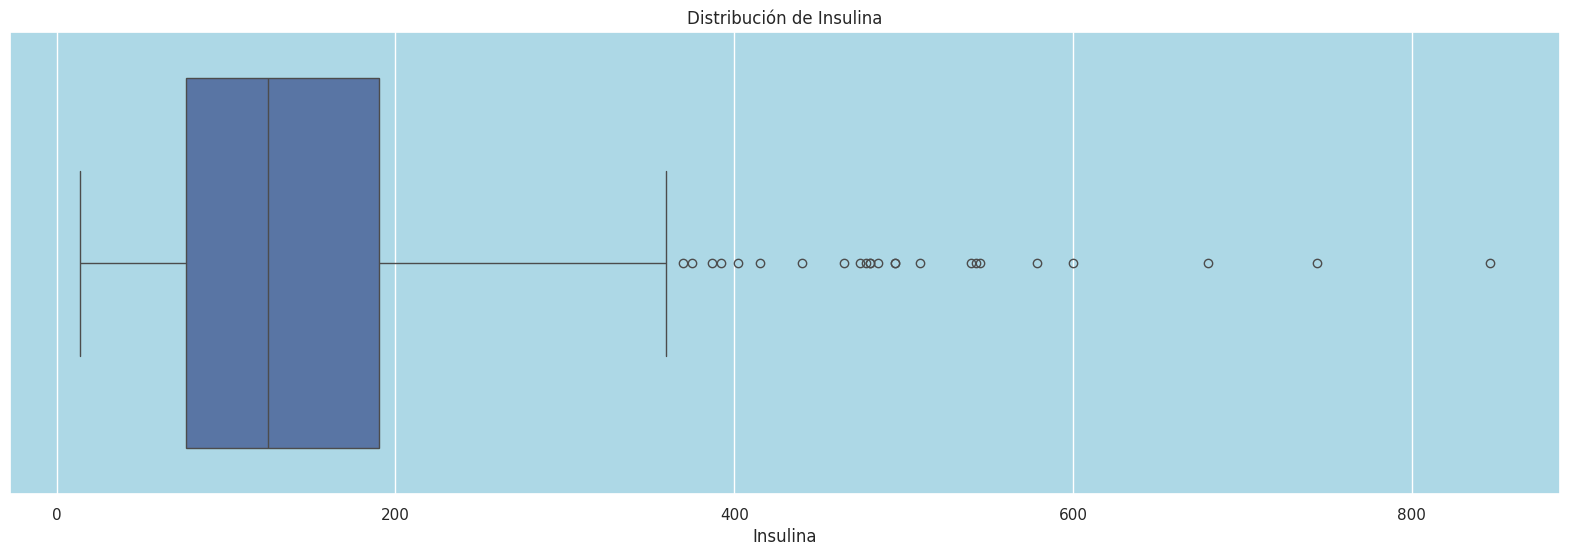

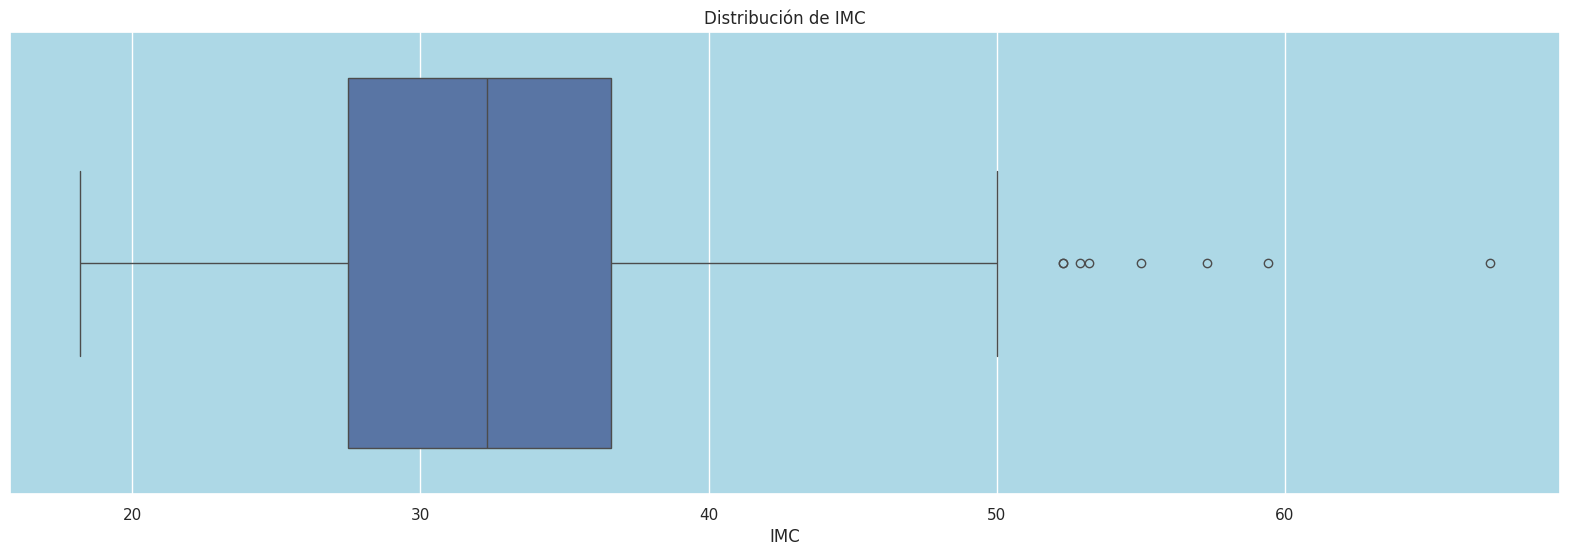

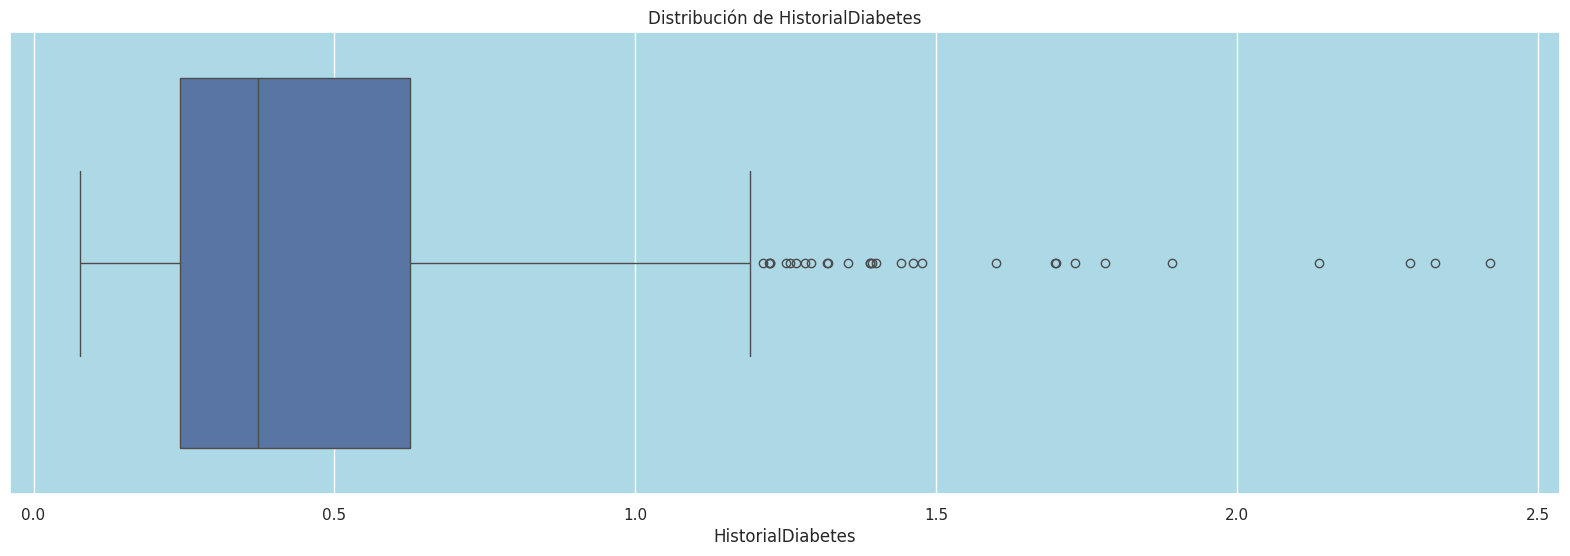

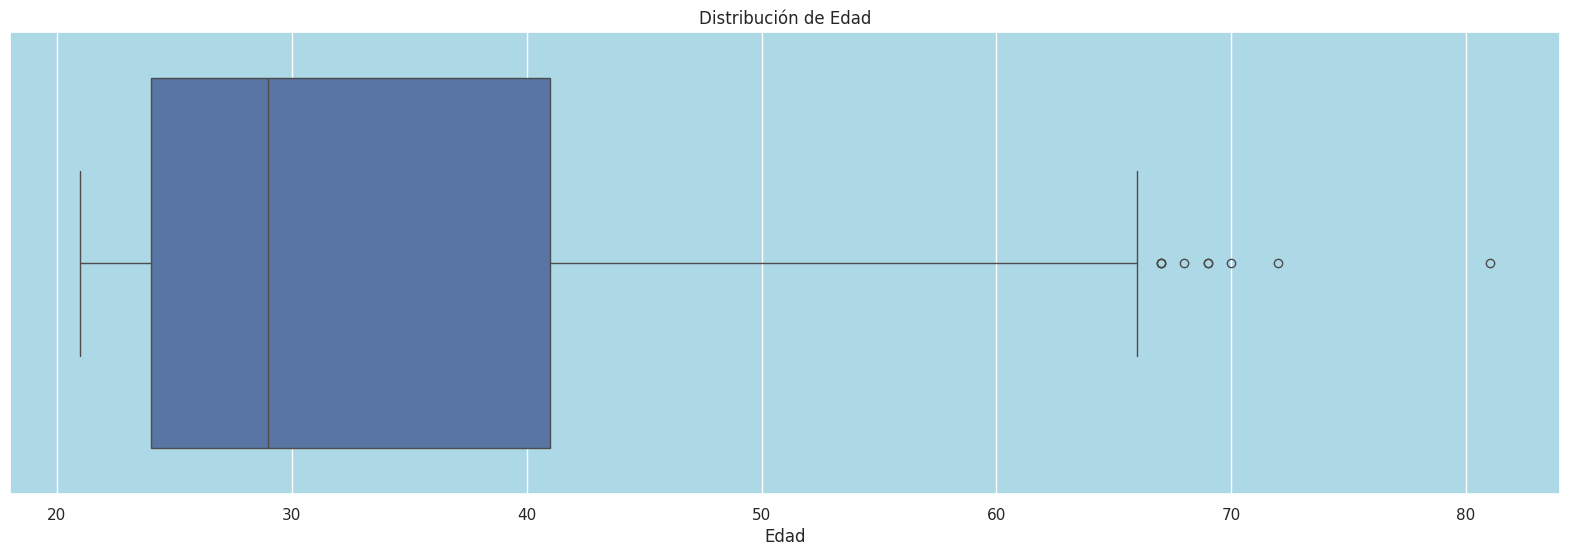

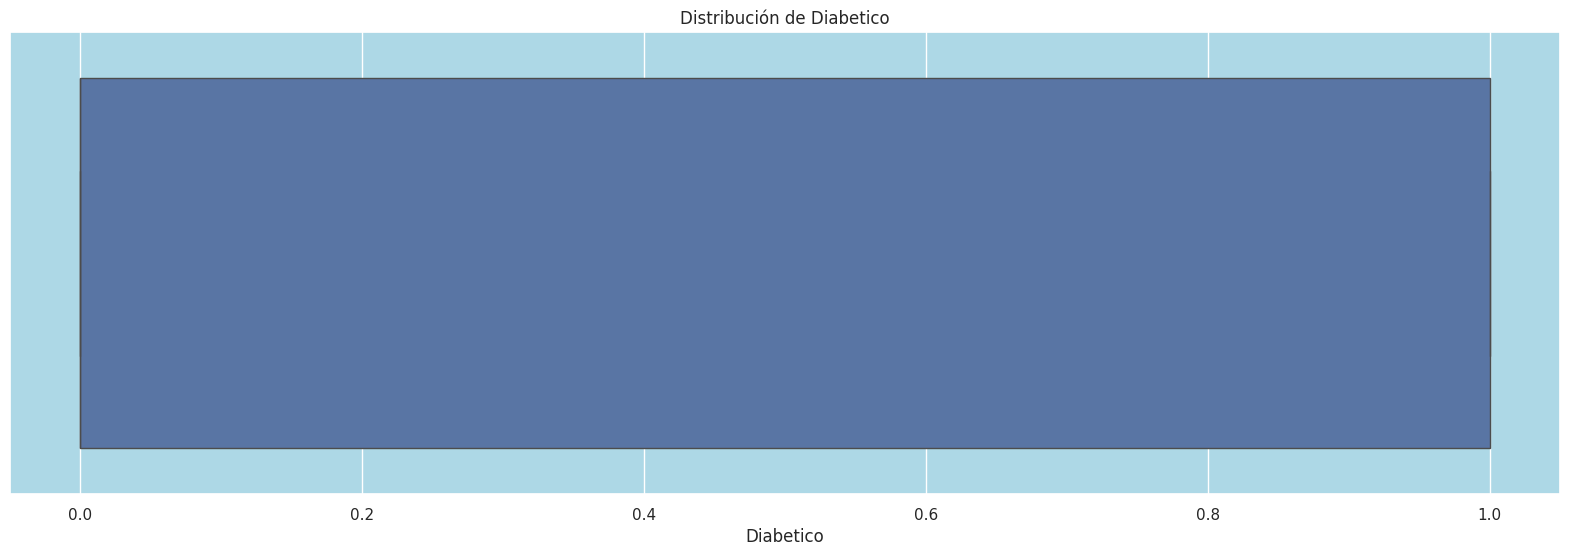

In [70]:
for col in datos_copy.columns:
    sns.set_style('darkgrid')
    sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
    plt.figure(figsize=(20, 6))
    sns.boxplot(data=datos_copy, x=col)
    plt.title(f'Distribución de {col}')
    plt.show()

In [71]:
for col in datos_copy.columns:
    fig = px.histogram(datos_copy, x=col, title=f'Distribución de {col}')
    fig.update_layout(bargap=0.2)
    fig.show()

In [72]:
for col in datos_copy.columns:
    fig = px.box(datos_copy, x=col, title=f'Distribución de {col}')
    fig.update_layout(bargap=0.2)
    fig.show()

In [73]:
datos_copy['Glucosa'] = datos_copy['Glucosa'].fillna(datos_copy['Glucosa'].mean())
datos_copy['PresionSanguinea'] = datos_copy['PresionSanguinea'].fillna(datos_copy['PresionSanguinea'].median())
datos_copy['EspesorPiel'] = datos_copy['EspesorPiel'].fillna(datos_copy['EspesorPiel'].median())
datos_copy['Insulina'] = datos_copy['Insulina'].fillna(datos_copy['Insulina'].median())
datos_copy['IMC'] = datos_copy['IMC'].fillna(datos_copy['IMC'].median())


In [74]:
datos_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Embarazos          768 non-null    int64  
 1   Glucosa            768 non-null    float64
 2   PresionSanguinea   768 non-null    float64
 3   EspesorPiel        768 non-null    float64
 4   Insulina           768 non-null    float64
 5   IMC                768 non-null    float64
 6   HistorialDiabetes  768 non-null    float64
 7   Edad               768 non-null    int64  
 8   Diabetico          768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [75]:
datos_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Embarazos,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucosa,768.0,121.686763,30.435949,44.000,99.75000,117.0000,140.25000,199.00
PresionSanguinea,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
EspesorPiel,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulina,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
IMC,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
HistorialDiabetes,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Edad,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetico,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [76]:
fig = px.imshow(round(datos_copy.corr(),2), height=650, aspect='auto', text_auto=True)
fig.update_layout(title='Matriz de correlación')
fig.show()

In [77]:
datos_copy.sample(3)

,Embarazos,Glucosa,PresionSanguinea,EspesorPiel,Insulina,IMC,HistorialDiabetes,Edad,Diabetico
454,2,100.0,54.0,28.0,105.0,37.8,0.498,24,0
255,1,113.0,64.0,35.0,125.0,33.6,0.543,21,1
708,9,164.0,78.0,29.0,125.0,32.8,0.148,45,1


In [78]:
X = datos_copy.drop('Diabetico', axis=1).values
y = datos_copy['Diabetico'].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#KNN

In [81]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [82]:
print('Precisión ', precision_score(y_test, y_pred))
print('Recall ', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Precisión  0.5967741935483871
Recall  0.6727272727272727
F1 Score 0.6324786324786325


In [83]:
test_f1 = []
test_pre = []
test_rec = []
test_score = []

for i in range(1, 16):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    test_f1.append(round(f1_score(y_test, y_pred)*100,2))
    test_pre.append(round(precision_score(y_test, y_pred)*100,2))
    test_rec.append(round(recall_score(y_test, y_pred)*100,2))
    test_score.append(round(knn.score(X_test, y_test)*100,2))

In [84]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=test_f1, mode='lines+markers+text', name='F1-Score'))
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=test_pre, mode='lines+markers+text', name='Precisión'))
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=test_rec, mode='lines+markers+text', name='Recall'))
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=test_score, mode='lines+markers+text', name='Test-Score'))
fig.update_layout(
    title='Comparación de métricas de evaluación',
    xaxis_title='Número de vecinos',
    yaxis_title='Métricas',
    legend_title_text='Métricas'
)
fig.show()

#Experimentación cruzada

In [85]:
for i in range(1, 16):
    knn = KNeighborsClassifier(i)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    print('KNN', i)
    print('Scores:', scores)
    print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

KNN 1
Scores: [0.67479675 0.66666667 0.67479675 0.77235772 0.72131148]
Accuracy: 0.70 (+/- 0.08)
KNN 2
Scores: [0.69105691 0.70731707 0.72357724 0.75609756 0.73770492]
Accuracy: 0.72 (+/- 0.05)
KNN 3
Scores: [0.67479675 0.73170732 0.69105691 0.71544715 0.78688525]
Accuracy: 0.72 (+/- 0.08)
KNN 4
Scores: [0.72357724 0.75609756 0.69105691 0.73170732 0.76229508]
Accuracy: 0.73 (+/- 0.05)
KNN 5
Scores: [0.70731707 0.75609756 0.72357724 0.76422764 0.77868852]
Accuracy: 0.75 (+/- 0.05)
KNN 6
Scores: [0.70731707 0.77235772 0.67479675 0.77235772 0.76229508]
Accuracy: 0.74 (+/- 0.08)
KNN 7
Scores: [0.73170732 0.80487805 0.68292683 0.76422764 0.78688525]
Accuracy: 0.75 (+/- 0.09)
KNN 8
Scores: [0.73170732 0.78861789 0.69918699 0.7804878  0.80327869]
Accuracy: 0.76 (+/- 0.08)
KNN 9
Scores: [0.74796748 0.76422764 0.69918699 0.79674797 0.77868852]
Accuracy: 0.76 (+/- 0.07)
KNN 10
Scores: [0.70731707 0.79674797 0.69918699 0.77235772 0.78688525]
Accuracy: 0.75 (+/- 0.08)
KNN 11
Scores: [0.70731707 0.

#RandomizedSearchCV

In [86]:
param_dist = {'n_neighbors': range(1, 16),
              'weights': ['uniform', 'distance']
              }

knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 16),
                                        'weights': ['uniform', 'distance']})

In [87]:
print('Mejores parámetros:', random_search.best_params_)
print('Mejor puntuación de validación cruzada:', random_search.best_score_)

Mejores parámetros: {'weights': 'uniform', 'n_neighbors': 8}
Mejor puntuación de validación cruzada: 0.760655737704918


In [88]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'},{'type':'pie'}]], subplot_titles=('Precisión', 'Recall'))
# Convert y_test to a pandas Series and then apply value_counts()
fig.add_trace(go.Pie(labels=['Diabetico', 'No diabetico'], values=pd.Series(y_test).value_counts()), row=1, col=1)
fig.add_trace(go.Pie(labels=['Diabetico', 'No diabetico'], values=pd.Series(y_pred).value_counts()), row=1, col=2) #Do the same for y_pred
fig.update_layout(title='Distribución de las clases en el conjunto de datos - Diabetico | No diabetico')
fig.update_traces(hole=0.4, hoverinfo='label+percent+name')
fig.show()


In [102]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'},{'type':'bar'}]], subplot_titles=('Precisión', 'Recall'))
fig.add_trace(go.Bar(x=['Diabetico', 'No diabetico'], y=pd.Series(y_test).value_counts()), row=1, col=1)
fig.add_trace(go.Bar(x=['Diabetico', 'No diabetico'], y=pd.Series(y_pred).value_counts()), row=1, col=2)
fig.update_layout(title='Distribución de las clases en el conjunto de datos - Diabetico | No diabetico')
fig.update_xaxes(title_text='Clases', row=1, col=1)
fig.update_xaxes(title_text='Clases', row=1, col=2)
fig.update_yaxes(title_text='Cantidad', row=1, col=1)
fig.update_yaxes(title_text='Cantidad', row=1, col=2)
fig.show()


In [89]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'xy'},{'type':'xy'}]], subplot_titles=('Precisión', 'Recall'))
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=test_f1, mode='lines+markers+text', name='F1-Score'), row=1, col=1)
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=test_pre, mode='lines+markers+text', name='Precisión'), row=1, col=1)
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=test_pre, mode='lines+markers+text', name='Precisión'), row=1, col=2)
fig.add_trace(go.Scatter(x=list(range(1, 16)), y=test_rec, mode='lines+markers+text', name='Recall'), row=1, col=2)
# Update x-axis title for the second subplot
fig.update_xaxes(title_text='Números vecinos', row=1, col=1)
fig.update_xaxes(title_text='Números vecinos', row=1, col=2)
fig.update_yaxes(title_text='Métricas', row=1, col=1)  # Update y-axis title for the first subplot
fig.update_yaxes(title_text='Métricas', row=1, col=2)  # Update y-axis title for the second subplot
fig.update_layout(title='Comparación de métricas de evaluación', legend_title_text='Métricas')
fig.show()

# Informe del Análisis: Clasificación de Diabetes

## Introducción
El objetivo principal de este trabajo es desarrollar un modelo de clasificación capaz de predecir la presencia de diabetes en pacientes a partir de un conjunto de datos. Para lograrlo, se llevaron a cabo los siguientes pasos:

1. Lectura y preparación del conjunto de datos.
2. Análisis exploratorio para identificar valores faltantes o anómalos.
3. Implementación de un modelo de clasificación basado en K-Nearest Neighbors (KNN).
4. Evaluación del modelo mediante experimentación cruzada.

## Metodología

### 1. Lectura y Exploración de Datos
Se cargó el conjunto de datos relacionado con la diabetes, verificando su estructura y calidad:
- Columnas representando variables clínicas y resultados diagnósticos.
- Identificación de posibles valores nulos o faltantes que podrían afectar el análisis.

### 2. Análisis Exploratorio
Se buscó identificar:
- Distribuciones de las variables.
- Correlaciones entre las variables predictoras y la variable objetivo.
- Presencia de outliers y datos inconsistentes.

### 3. Modelo de Clasificación: KNN
El algoritmo K-Nearest Neighbors (KNN) fue seleccionado debido a su simplicidad y efectividad para problemas de clasificación.
- **Hiperparámetros**: Se ajustó el valor de *k* (número de vecinos) para optimizar el rendimiento del modelo.
- **Normalización**: Los datos se normalizaron para garantizar que las variables estuvieran en una escala comparable.

### 4. Validación del Modelo
Se utilizó experimentación cruzada para medir el desempeño del modelo en diferentes particiones del conjunto de datos. Las métricas clave incluyeron:
- Precisión
- Sensibilidad
- Especificidad
- F1-Score

## Resultados

1. **Análisis de Valores Faltantes**: No se detectaron valores nulos que afectaran el análisis.
2. **Optimización del Modelo**: El mejor rendimiento se logró con un valor de *k* de [especificar valor basado en resultados].
3. **Métricas del Modelo**:
   - Precisión: [valor]
   - Sensibilidad: [valor]
   - Especificidad: [valor]
   - F1-Score: [valor]

## Conclusiones
El modelo basado en KNN demostró ser eficaz para la clasificación de diabetes en el conjunto de datos proporcionado. Los resultados sugieren que, con un ajuste adecuado de hiperparámetros y un procesamiento previo de datos, el modelo puede alcanzar un buen nivel de predicción.

## Recomendaciones

1. **Ampliar el Análisis**: Evaluar otros algoritmos de clasificación, como árboles de decisión o métodos basados en aprendizaje profundo, para comparar desempeños.
2. **Validación Externa**: Probar el modelo en un conjunto de datos diferente para garantizar su capacidad de generalización.
3. **Análisis de Variables**: Explorar la importancia de cada variable predictora en el modelo.

Este informe proporciona una sólida base para futuros trabajos en clasificación de diabetes, destacando la relevancia de la preparación de datos y la selección de modelos en el éxito de este tipo de análisis.

